In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display
import seaborn as sns
from matplotlib import font_manager, rc, rcParams
from sklearn.model_selection import train_test_split
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
rcParams['axes.unicode_minus'] = False
%matplotlib notebook

# SVM

## 선형과 비선형 특성

In [8]:
from mglearn.make_blobs import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y=y%2

<IPython.core.display.Javascript object>


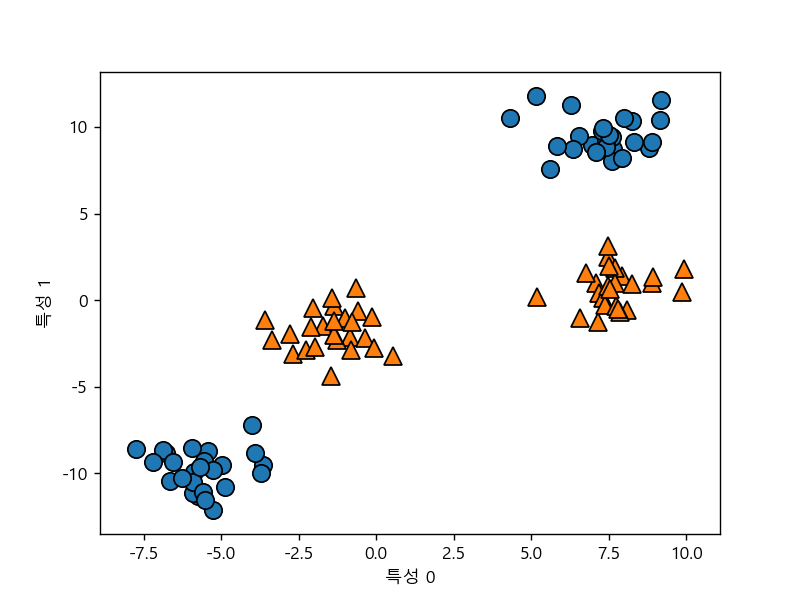

Text(0, 0.5, '특성 1')

In [11]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<IPython.core.display.Javascript object>


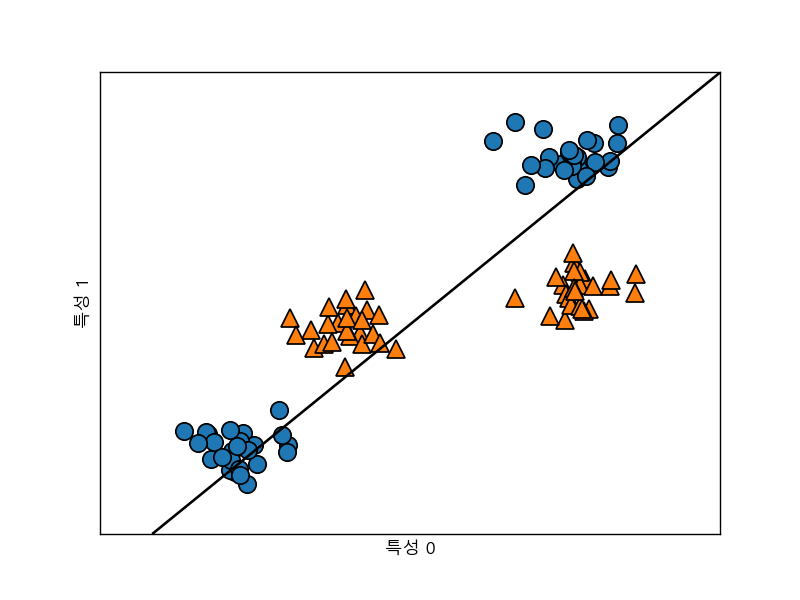

Text(0, 0.5, '특성 1')

In [13]:
from sklearn.svm import LinearSVC
li_svc = LinearSVC().fit(X,y)

plt.figure()
mglearn.plots.plot_2d_separator(li_svc,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

<IPython.core.display.Javascript object>


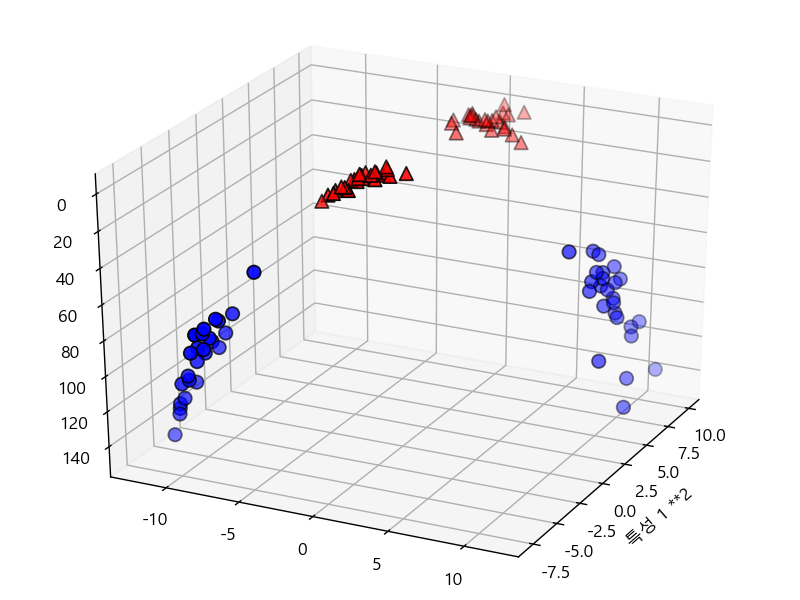

Text(0.5, 0, '특성 1 **2')

In [14]:
X_new = np.hstack([X,X[:,1:]**2]) # 새로운 특성 추가

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60,edgecolors='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60,edgecolors='k')
ax.set_xlabel('특성 0')
ax.set_xlabel('특성 1')
ax.set_xlabel('특성 1 **2')

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<IPython.core.display.Javascript object>


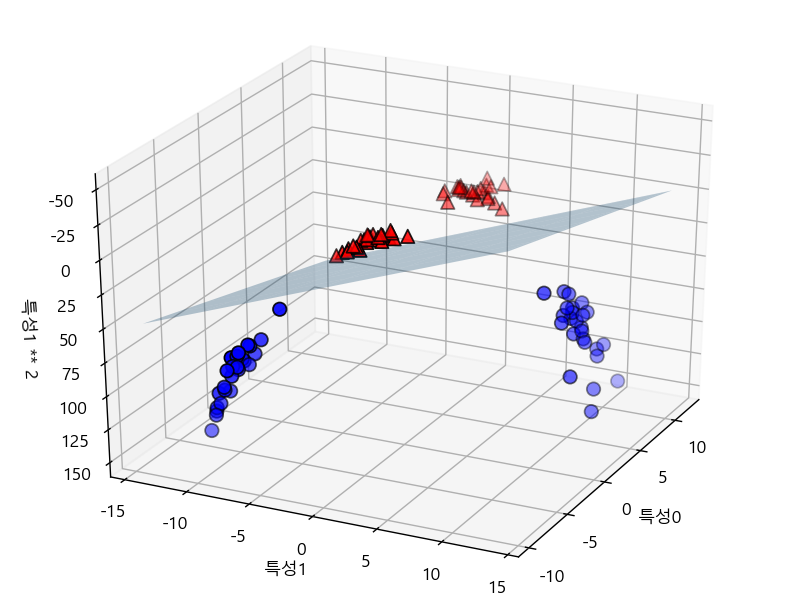

Text(0.5, 0, '특성1 ** 2')

In [15]:
linear_svm_3d = LinearSVC().fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")